# Transmission of Air Rayleigh Scattering
==============================================================


The purpose is to calculate the transmission of air due to Rayleigh Scattering

- author : Sylvie Dagoret-Campagne
- date :May  3rd 2017

In [28]:
import numpy as np
import pandas as pd

# Set up matplotlib and use a nicer set of plot parameters
#%config InlineBackend.rc = {}
import matplotlib
#matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt

%matplotlib inline

#import matplotlib as mpl

In [29]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [30]:
from astropy.constants import N_A,R,g0
from astropy import units as u

# Initialisation

## Constants

In [59]:
distance=200*u.m
altitude=650*u.m

In [32]:
M_air= 28.965338*u.g/u.mol
M_air_dry=28.9644*u.g/u.mol
M_h2o=18.016*u.g/u.mol

P0=101325.*u.Pa;   # /*!< Pa : pressure at see level */
T0=288.15*u.K;   #/*!< sea level temperature */  
L=0.0065*u.K/u.m  # refroidissement en fonction de l'altitude

##  Functions

In [33]:
def Pressure(h):
    P=P0*np.exp(g0*M_air_dry/R/L*np.log(1-L*h/T0))
    return P

In [34]:
def XDepth(altitude,costh=1):
    """
    Function : XDepth(altitude,costh)
      Provide the column depth in gr / cm^2 equivalent of airmass in physical units
    - Input :  altitude : input altitude in meters
    - Input :  costh    : input cosimus of zenith angle 
    - Output :  XDepth  : output column depth in gr per cm squared
    """
    h=altitude
    XD=Pressure(h)/g0/costh
    return XD

In [35]:
def RayOptDepth(wavelength, altitude=0*u.m, costh=1):
    """
    Function RayOptDepth(double wavelength, double altitude, double costh)

    Provide Rayleigh optical depth
         
    - Input  wavelength : input wavelength in nm
    - Input  altitude : input altitude in meters
    - Input   costh    : input cosimus of zenith angle 
    - Output  OptDepth  : output optical depth no unit, for Rayleigh
    """

    h=altitude

    A=(XDepth(h,costh)/(3102.*u.g/(u.cm*u.cm)))
    B=np.exp(-4.*np.log(wavelength/(400.*u.nm)))  
    C= 1-0.0722*np.exp(-2*np.log(wavelength/(400.*u.nm)))

    OD=A*B/C
        
    #double OD=XDepth(altitude,costh)/2970.*np.power((wavelength/400.),-4);

    return OD

In [36]:
def RayOptDepthXD(wavelength, xdepth):
    """
    Function RayOptDepthXD(wavelength, xdepth)

    Provide Rayleigh optical depth
         
    - Input  wavelength : input wavelength in nm
    - Input   xdepth   : depth
    - Output  OptDepth  : output optical depth no unit, for Rayleigh
    """

    A=xdepth/(3102.*u.g/(u.cm*u.cm))
    B=np.exp(-4.*np.log(wavelength/(400.*u.nm)))  
    C= 1-0.0722*np.exp(-2*np.log(wavelength/(400.*u.nm)))

    OD=A*B/C       
    
    return OD

## Data

In [37]:
atm_ground_file='atm_OHP_ground.csv'
atm_groundsum_file='atm_OHP_groundsum.csv'

In [38]:
df=pd.read_csv(atm_ground_file)

In [39]:
df  # Pressure in hPa, T in Kelvin, densities in molecules per cm^3

,Unnamed: 0,P,T,Air,O2,O3,PWV,CO2,NO2
0,afglus_grd,937.22595,283.98,2.390570e+19,5.000690e+18,6.785990e+11,1.592780e+17,7.895830e+15,550316000.0
1,afglmw_grd,937.82373,269.93,2.516510e+19,5.262860e+18,7.031330e+11,9.457420e+16,8.309770e+15,579166000.0
2,afglms_grd,939.39349,291.28,2.335970e+19,4.886270e+18,7.539820e+11,3.629170e+17,7.715160e+15,537723000.0


In [41]:
d_Air_us=df['Air'][0]/(u.cm)**3  # molec/cm^3 : H2O density  for US standard atmosphere at ground
d_Air_mw=df['Air'][1]/(u.cm)**3 # molec/cm^3 : H2O density  for Mid latitude winter atmosphere at ground
d_Air_ms=df['Air'][2]/(u.cm)**3 # molec/cm^3 : H2O density  for Mid latitude summer atmosphere at ground

# Calculate Rayleigh

In [45]:
XDepth_us=d_Air_us*distance/N_A*M_air_dry
XDepth_mw=d_Air_mw*distance/N_A*M_air_dry
XDepth_ms=d_Air_ms*distance/N_A*M_air_dry

In [46]:
wavelength=np.linspace(200.,1100.,100)*u.nm

In [50]:
rayleigh_od_us= RayOptDepthXD(wavelength,XDepth_us)
rayleigh_od_mw= RayOptDepthXD(wavelength,XDepth_mw)
rayleigh_od_ms= RayOptDepthXD(wavelength,XDepth_ms)

In [60]:
rayleigh_vod=RayOptDepth(wavelength, altitude=altitude)

In [63]:
print rayleigh_vod.decompose()

[  6.93372422e+00   5.61044517e+00   4.59748353e+00   3.80916345e+00
   3.18682843e+00   2.68932592e+00   2.28716886e+00   1.95883678e+00
   1.68836670e+00   1.46374595e+00   1.27581690e+00   1.11751641e+00
   9.83338678e-01   8.68950101e-01   7.70909249e-01   6.86460713e-01
   6.13381566e-01   5.49865804e-01   4.94436499e-01   4.45878427e-01
   4.03185948e-01   3.65522365e-01   3.32188017e-01   3.02595026e-01
   2.76247214e-01   2.52723999e-01   2.31667437e-01   2.12771720e-01
   1.95774622e-01   1.80450507e-01   1.66604578e-01   1.54068125e-01
   1.42694591e-01   1.32356295e-01   1.22941687e-01   1.14353052e-01
   1.06504577e-01   9.93207147e-02   9.27347963e-02   8.66878571e-02
   8.11276303e-02   7.60076889e-02   7.12867090e-02   6.69278368e-02
   6.28981422e-02   5.91681477e-02   5.57114191e-02   5.25042108e-02
   4.95251567e-02   4.67550010e-02   4.41763626e-02   4.17735290e-02
   3.95322747e-02   3.74397030e-02   3.54841048e-02   3.36548355e-02
   3.19422053e-02   3.03373828e-02

In [65]:
T_us=np.exp(-rayleigh_od_us.decompose())
T_mw=np.exp(-rayleigh_od_mw.decompose())
T_ms=np.exp(-rayleigh_od_ms.decompose())
T_vod=np.exp(-rayleigh_vod.decompose())

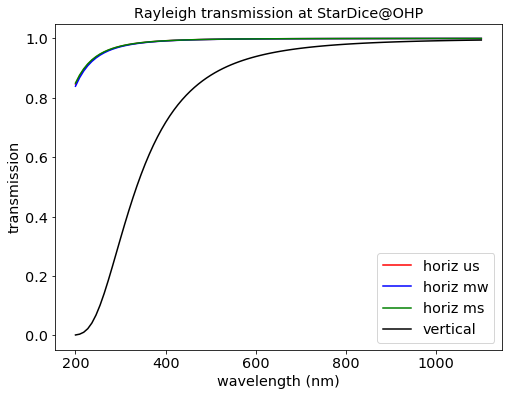

In [69]:
plt.plot(wavelength,T_us,'r',label='horiz us')
plt.plot(wavelength,T_mw,'b',label='horiz mw')
plt.plot(wavelength,T_ms,'g',label='horiz ms')
plt.plot(wavelength,T_vod,'k',label='vertical')
plt.title('Rayleigh transmission at StarDice@OHP')
plt.ylabel('transmission')
plt.xlabel('wavelength (nm)')
plt.legend()